# Regresion Lineal sobre precios de casas

## Objetivo
Predecir el precio de casas en California usando regresion lineal, evaluando el rendimiento con metricas como MAE, MSE y aplicando normalizacion.

## Cargo la Data

In [31]:
# Importo librerias
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_source = fetch_california_housing()
X = pd.DataFrame(data_source.data, columns=data_source.feature_names)
y = pd.Series(data_source.target, name="MedHouseVal")

## Exploracion inicial

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Verifico si hay valores nulos y que los tipos de datos esten estandarizados

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

## Normalizacion

In [14]:
# Creo una instancia a escalar
scaler = StandardScaler()

In [15]:
# Aplico la normalización
X_scaled = scaler.fit_transform(X)

## Division de datos para entrenamiento y pruebas

In [73]:
# Divido mis datos en variables de entrenamiento y pruebas
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [74]:
# Cargo una instancia del modelo
model = LinearRegression()
# Entreno el modelo con los datos de entrenamiento
model.fit(X_entrena, y_entrena)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predicción y evaluación

In [76]:
# Multiplico por 100000 para convertir los valores a millones
y_predictions = model.predict(X_prueba)
mae = mean_absolute_error(y_prueba, y_predictions)
mse = mean_squared_error(y_prueba, y_predictions)
print(f"MAE: {mae*100000:,.2f} USD")
print(f"MSE: {mse*100000:,.2f} USD")

MAE: 53,320.01%
MSE: 55,589.16%


### MAE (Mean Absolute Error) --> Mide el promedio de los errores absolutos entre las predicciones y los valores reales.:
* El modelo se equivoca en promedio 53.32 mil millones de dólares por casa (porque el target MedHouseVal es en millones de dólares).
### MSE (Mean Squared Error) --> Mide el promedio de los errores cuadrados entre las predicciones y los valores reales y penaliza más los errores grandes.:
* Un MSE de 55.58 significa que hay errores grandes que están influyendo en el promedio.

En resumen, el modelo con `LinearRegression()` no solo se equivoca, sino que algunas predicciones están muy lejos de los valores reales. Y esto sugiere que el modelo lineal no está captando bien la complejidad del problema.


## Visualizacion Sugerida

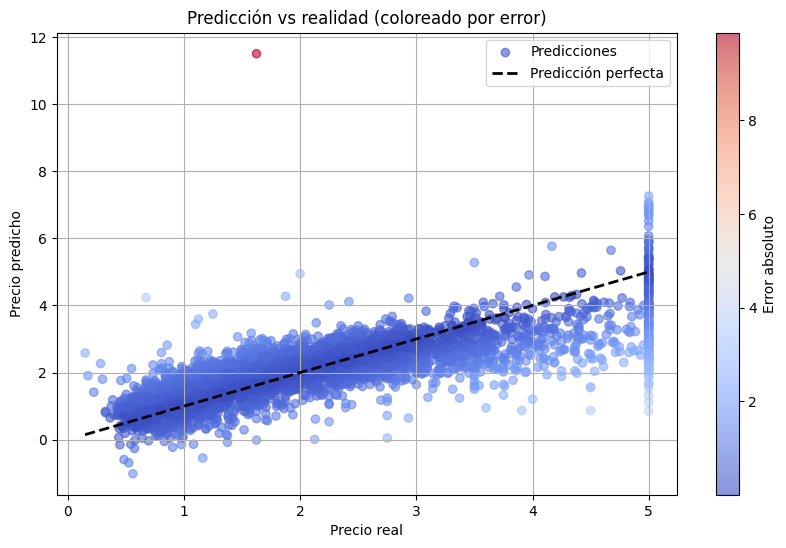

In [57]:
errores = abs(y_prueba - y_predictions)

plt.figure(figsize=(10,6))
plt.scatter(y_prueba, y_predictions, c=errores, cmap='coolwarm', alpha=0.6, label='Predicciones')
plt.plot([y_prueba.min(), y_prueba.max()], [y_prueba.min(), y_prueba.max()], 'k--', lw=2, label='Predicción perfecta') # Agrego la linea ideal
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicción vs realidad (coloreado por error)")
plt.colorbar(label='Error absoluto')
plt.legend()
plt.grid(True)
plt.show();


#### Interpretación:
- Colores más cálidos = errores más grandes
- Colores fríos = predicciones más precisas

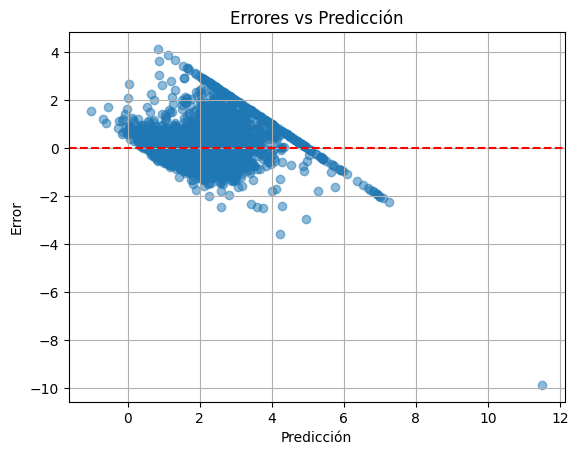

In [38]:
# Grafico los errores
residuos = y_prueba - y_predictions
plt.scatter(y_predictions, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Error")
plt.title("Errores vs Predicción")
plt.grid(True)
plt.show()


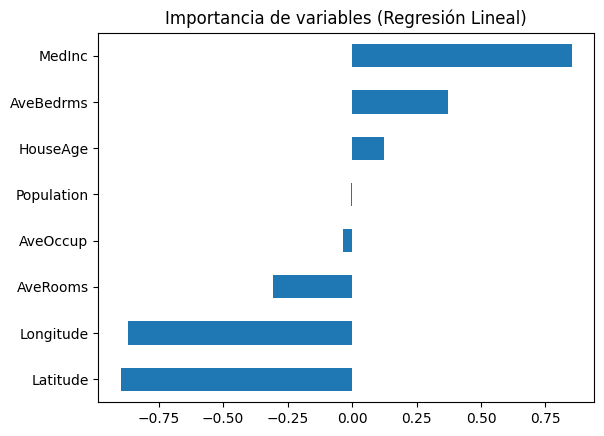

In [39]:
coef = pd.Series(model.coef_, index=data_source.feature_names)
coef.sort_values().plot(kind='barh', title="Importancia de variables (Regresión Lineal)")
plt.show()


## Seleccion de modelos

Ya que se visualiza que el modelo con `LinearRegression()` devuelve errores muy grandes, entonces comparo vs otro modelo, como `RandomForestRegression()` ya que es más robusto.

In [35]:
# Almaceno modelos
modelos = [
    ('Modelo lineal', LinearRegression()),
    ('Modelo bosque aleatorio', RandomForestRegressor(random_state=42))
]
# Entreno modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'Modelo: {nombre}, Puntaje: {puntaje*100:.2f}%')

Modelo: Modelo lineal, Puntaje: 57.58%
Modelo: Modelo bosque aleatorio, Puntaje: 80.50%


### R² (coeficiente de determinación) --> También conocido como el puntaje de ajuste del modelo
Mide que proporcion de la variable objetívo (`y_prueba`) es explicada por el modelo.:
* Va de 0 a 1, en este caso al multiplicarse x100, va de 0% a 100%.
* Un R² de 80.5%, significa que el modelo explica el 80.5% de la variabilidad en los precios de las casas.

Comparé dos modelos usando el coeficiente de determinación R². El modelo lineal obtuvo un 57.58%, lo que indica que explica poco más de la mitad de la variabilidad en los precios. En cambio, el modelo de Random Forest alcanzó un 80.5%, mostrando que captura mejor las relaciones no lineales del problema. Esto me permitió justificar el uso de un modelo más complejo para mejorar la precisión.

In [33]:
# Cargo una instancia del modelo bosque aleatorio
modelo_rand_forest = RandomForestRegressor(random_state=42)

# Entreno el modelo con los datos de entrenamiento
modelo_rand_forest.fit(X_entrena, y_entrena)

# Realizo las predicciones usando el conjunto de prueba
predicciones_rand_forest = modelo_rand_forest.predict(X_prueba)

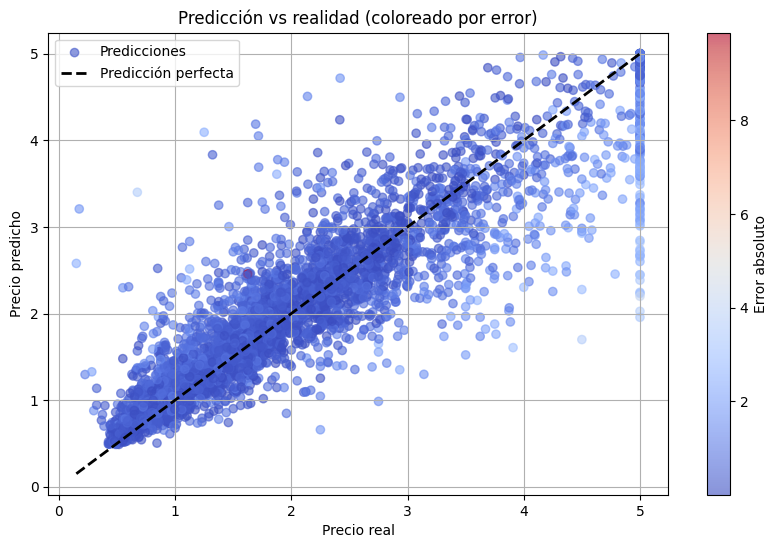

In [54]:
errores = abs(y_prueba - y_predictions)

plt.figure(figsize=(10,6))
plt.scatter(y_prueba, predicciones_rand_forest, c=errores, cmap='coolwarm', alpha=0.6, label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Predicción perfecta') # Agrego la linea ideal
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicción vs realidad (coloreado por error)")
plt.colorbar(label='Error absoluto')
plt.legend()
plt.grid(True)
plt.show();


# Caso práctico: Predicción de precios de casas en California con regresión

## Objetivo
Entrenar y comparar modelos de regresión para predecir el valor medio de viviendas en California, usando el dataset fetch_california_housing de scikit-learn.

## Pasos realizados
- Carga y exploración del dataset
- Verificación de valores nulos y distribución de variables
- Normalización de variables predictoras con StandardScaler
- División en entrenamiento y prueba
- Entrenamiento de modelo de regresión lineal
- Evaluación con métricas MAE y MSE
- Visualización de dispersión entre valores reales y predichos
- Comparación con modelo RandomForestRegressor
- Visualización de errores y línea de predicción perfecta
- Análisis de importancia de variables en regresión lineal

## Resultados
### - Regresión lineal:
- R²: 57.58%
- MAE: ~$53,320 USD

- MSE: ~$55,590 USD²
### - Random Forest:
- R²: 80.50%
- Mejora significativa en ajuste y reducción de error
- Visualización muestra dispersión amplia en regresión lineal y mejor alineación en Random Forest

# Reflexión
"Aunque la regresión lineal ofreció una base interpretativa, su capacidad de ajuste fue limitada. Al analizar los errores y la importancia de variables, identifiqué que el modelo no capturaba bien las relaciones no lineales del problema. Al probar con Random Forest, el rendimiento mejoró significativamente, confirmando que el problema requería un enfoque más robusto. Este ejercicio me permitió entender cómo elegir el modelo adecuado según la naturaleza del dataset y cómo validar su comportamiento con métricas y visualizaciones."



